In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import io
import os
import glob

import numpy as np
import scipy
import seaborn as sns

In [6]:
df= pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
df.sample(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
95396,01/18/2023,10/01/2020,10/31/2020,By Month,2020.0,10.0,South Dakota,Male,35-44 years,0.0,21.0,0.0,0.0,0.0,0.0,NaN
4986,01/18/2023,01/01/2023,01/14/2023,By Year,2023.0,NaN,Florida,Female,15-24 years,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1-9...
88615,01/18/2023,01/01/2022,01/31/2022,By Month,2022.0,1.0,Oregon,Male,45-54 years,15.0,117.0,13.0,NaN,0.0,22.0,One or more data cells have counts between 1-9...
72544,01/18/2023,06/01/2020,06/30/2020,By Month,2020.0,6.0,New Jersey,Male,15-24 years,0.0,30.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
33118,01/18/2023,10/01/2020,10/31/2020,By Month,2020.0,10.0,Florida,Male,0-17 years,0.0,101.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...


In [39]:
df.shape

(115668, 16)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115668 entries, 0 to 115667
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                115668 non-null  object 
 1   Start Date                                115668 non-null  object 
 2   End Date                                  115668 non-null  object 
 3   Group                                     115668 non-null  object 
 4   Year                                      112914 non-null  float64
 5   Month                                     101898 non-null  float64
 6   State                                     115668 non-null  object 
 7   Sex                                       115668 non-null  object 
 8   Age Group                                 115668 non-null  object 
 9   COVID-19 Deaths                           83845 non-null   float64
 10  Total Deaths        

In [41]:
df.describe()

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,112914.000000,101898.000000,8.384500e+04,9.852200e+04,7.937500e+04,85192.000000,93261.000000,7.999000e+04
mean,2021.097561,6.351351,3.517634e+02,2.812182e+03,3.497108e+02,174.884355,4.937058,5.352093e+02
std,0.905405,3.519970,6.263515e+03,5.226995e+04,6.016664e+03,3162.390684,103.262381,9.239907e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,4.100000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,2021.000000,6.000000,1.000000e+01,1.480000e+02,1.700000e+01,0.000000,0.000000,2.500000e+01
75%,2022.000000,9.000000,6.000000e+01,6.480000e+02,7.600000e+01,26.000000,0.000000,1.120000e+02
max,2023.000000,12.000000,1.094723e+06,1.014481e+07,1.030983e+06,550128.000000,18477.000000,1.591892e+06


In [2]:
df2=df[df["COVID-19 Deaths"]>0]
df2.head()


NameError: name 'df' is not defined

In [5]:
#drop colums not need for further analysis  dropped
df3=df2.drop(columns=['Influenza Deaths','Pneumonia Deaths','Footnote'])
df3.head()

NameError: name 'df2' is not defined

In [60]:
df4=df3.dropna()
print(df4.sample(5))
print(df4.shape)

       Data As Of  Start Date    End Date     Group    Year  Month  \
48824  01/18/2023  10/01/2021  10/31/2021  By Month  2021.0   10.0   
35459  01/18/2023  07/01/2021  07/31/2021  By Month  2021.0    7.0   
31178  01/18/2023  09/01/2020  09/30/2020  By Month  2020.0    9.0   
73295  01/18/2023  09/01/2021  09/30/2021  By Month  2021.0    9.0   
40761  01/18/2023  12/01/2020  12/31/2020  By Month  2020.0   12.0   

                      State        Sex    Age Group  COVID-19 Deaths  \
48824              Kentucky       Male     All Ages            632.0   
35459               Georgia  All Sexes  65-74 years             75.0   
31178  District of Columbia       Male     All Ages             14.0   
73295            New Jersey  All Sexes  30-39 years             17.0   
40761              Illinois  All Sexes  50-64 years            494.0   

       Total Deaths  Pneumonia and COVID-19 Deaths  \
48824        2894.0                          397.0   
35459        1824.0                   

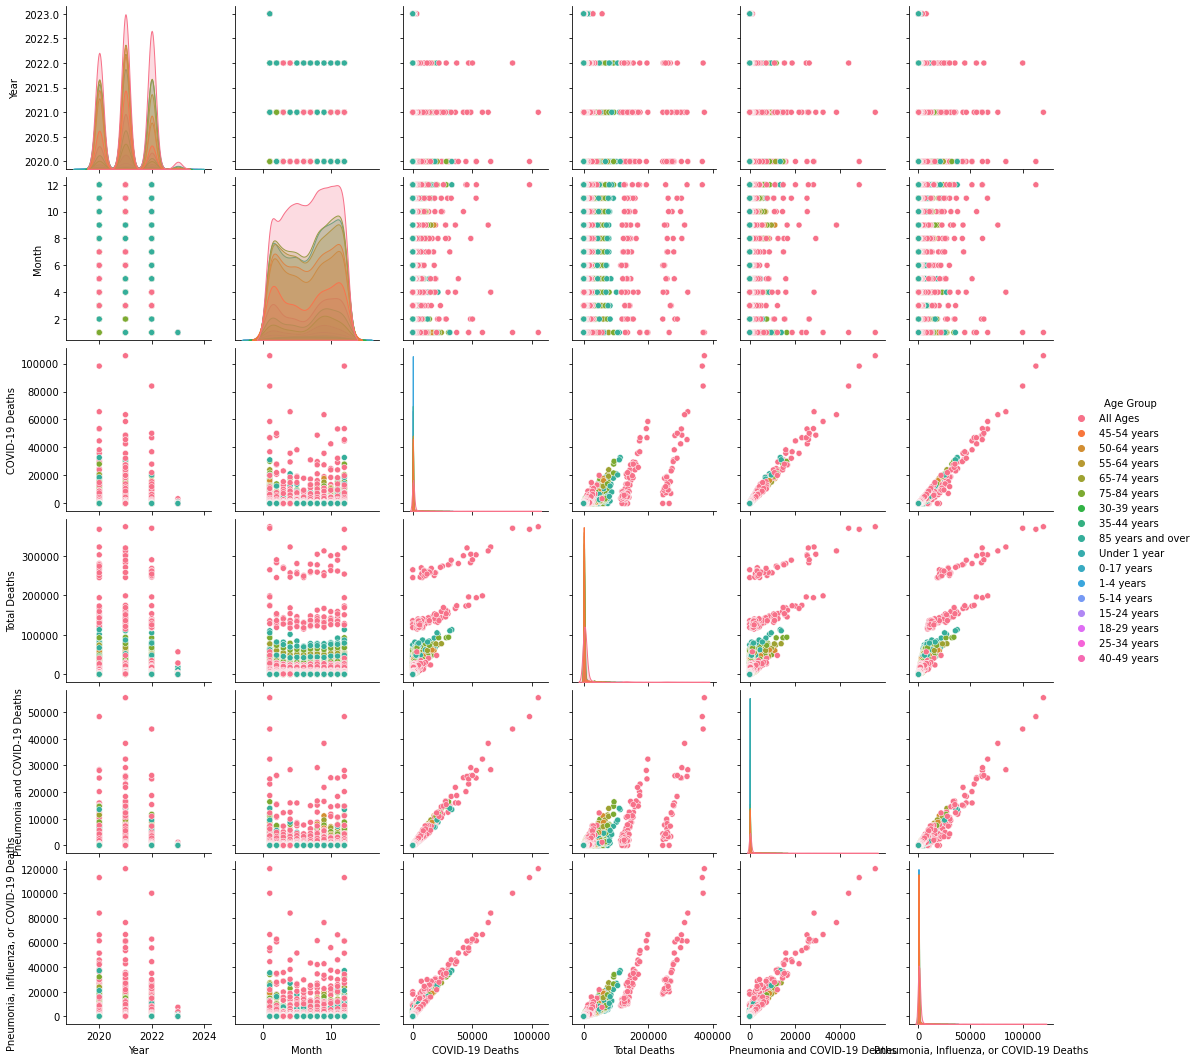

In [64]:
sns.pairplot(df4,hue='Age Group')

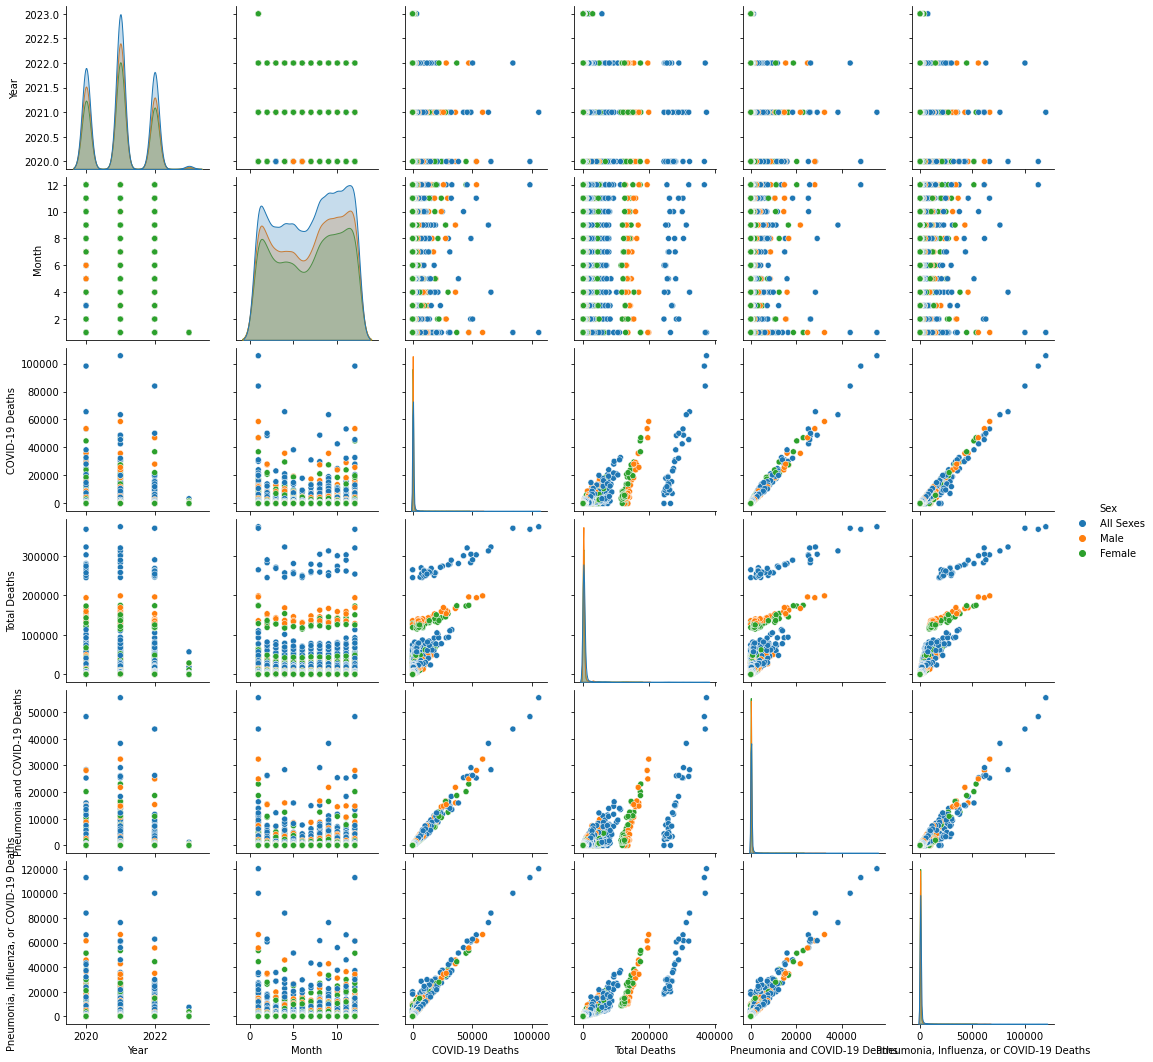

In [61]:
sns.pairplot(df4,hue='Sex')

<AxesSubplot:xlabel='Month', ylabel='COVID-19 Deaths'>

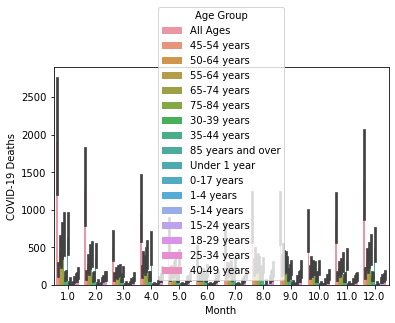

In [63]:
sns.barplot(data=df4, x="Month", y="COVID-19 Deaths",hue="Age Group")

In [62]:
df4.sample()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
105468,01/18/2023,11/01/2021,11/30/2021,By Month,2021.0,11.0,Virginia,All Sexes,All Ages,600.0,7204.0,301.0,883.0


In [7]:
df_death_state= pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')
df_death_state.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,01/15/2023,01/01/2020,01/14/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1482.0,1550.0,NaN
1,01/15/2023,01/01/2020,01/14/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5686.0,5902.0,NaN
2,01/15/2023,01/01/2020,01/14/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14860.0,15472.0,NaN
3,01/15/2023,01/01/2020,01/14/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,36948.0,38395.0,NaN
4,01/15/2023,01/01/2020,01/14/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,81274.0,84225.0,NaN
